In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [4]:
students=pd.read_csv(r"student-data.csv")

In [5]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [6]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [7]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
students.shape

(395, 31)

In [18]:
students.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

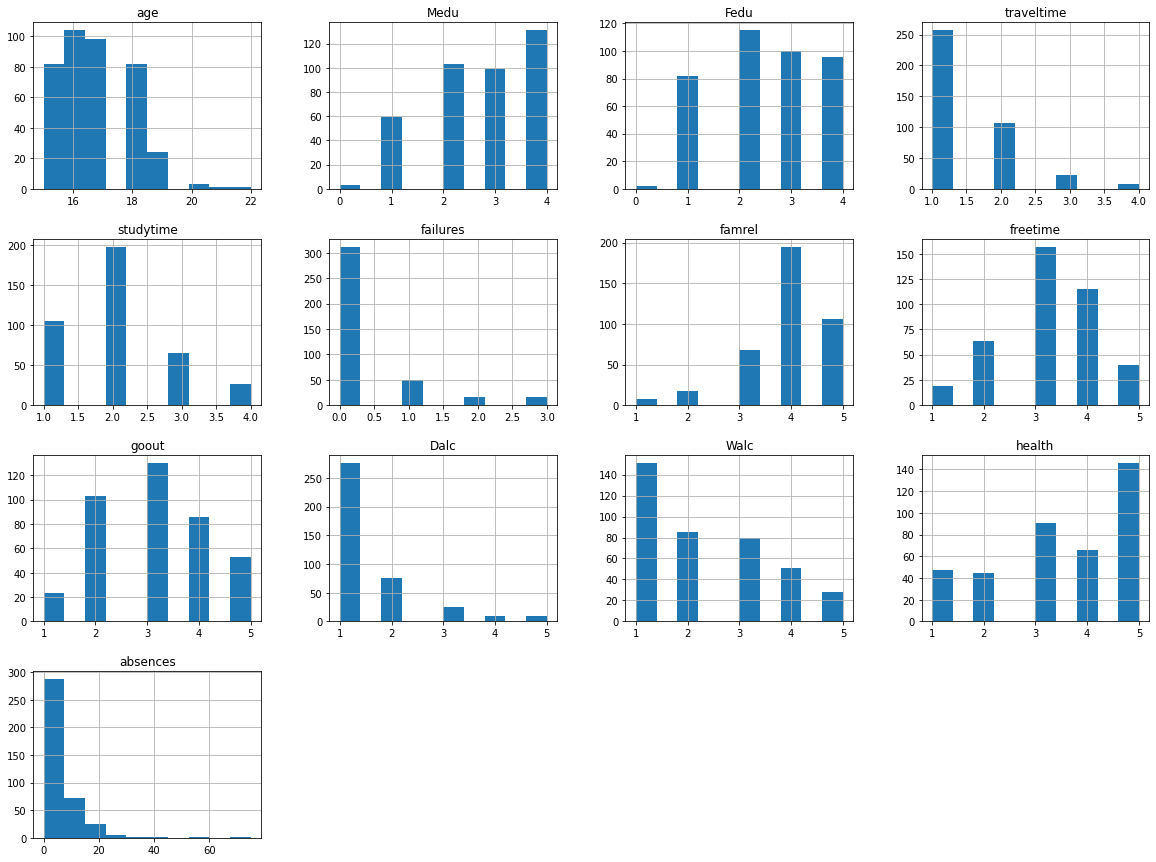

In [35]:
graph=students.select_dtypes(include=["int64"])
graph.hist(figsize=(20,15))
plt.show()

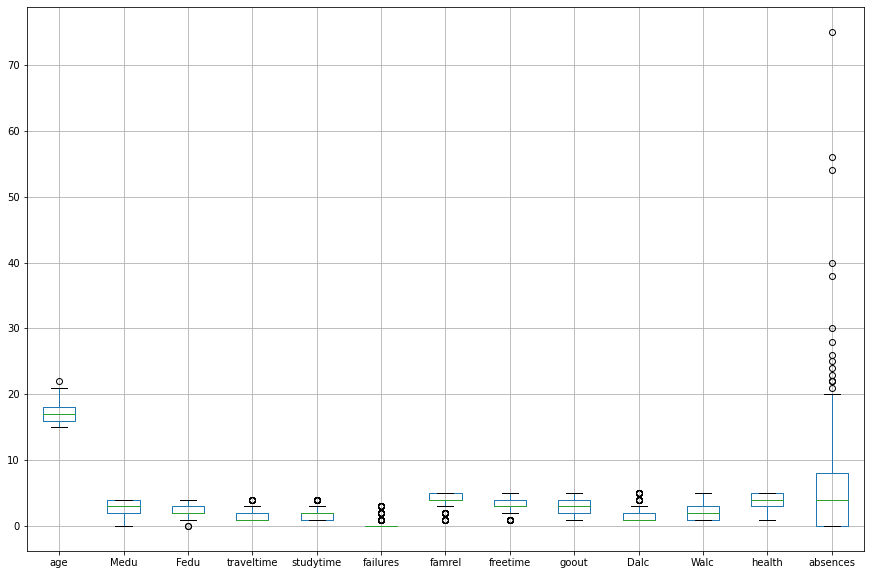

In [38]:
students.boxplot(figsize=(15,10))
plt.show()

In [41]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed', 'Paredu'],
      dtype='object')

In [39]:
print(students['Fedu'].value_counts().sort_index(ascending=False))
print(students['Medu'].value_counts().sort_index(ascending=False))

4     96
3    100
2    115
1     82
0      2
Name: Fedu, dtype: int64
4    131
3     99
2    103
1     59
0      3
Name: Medu, dtype: int64


In [40]:
students['Paredu'] = students['Fedu'] + students ['Medu']
print(students['Paredu'].value_counts().sort_index(ascending=False))



8    70
7    58
6    64
5    47
4    72
3    43
2    39
1     2
Name: Paredu, dtype: int64


In [37]:
students.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [42]:
students.drop(['Fedu','Medu'],axis=1,inplace=True)

In [43]:
print(students['Dalc'].value_counts().sort_index(ascending=False))
print(students['Walc'].value_counts().sort_index(ascending=False))

5      9
4      9
3     26
2     75
1    276
Name: Dalc, dtype: int64
5     28
4     51
3     80
2     85
1    151
Name: Walc, dtype: int64


In [44]:
#Adding the columns
students['Alcohol'] = students['Walc'] + students['Dalc']

In [45]:
students.drop(['Walc','Dalc'],axis=1,inplace=True)

In [46]:
print(students['famsup'].value_counts())
print(students['schoolsup'].value_counts())

yes    242
no     153
Name: famsup, dtype: int64
no     344
yes     51
Name: schoolsup, dtype: int64


In [47]:
#Converting yes to 1 and no to 0
students['famsup'] = students['famsup'].map({'yes': 1, 'no': 0})
students['schoolsup'] = students['schoolsup'].map({'yes': 1, 'no': 0})

In [48]:
#Adding the columns
students['support'] = students['famsup'] + students['schoolsup']

In [49]:
students.drop(['famsup','schoolsup'],axis=1,inplace=True)

In [50]:
print(students['support'].value_counts())

1    217
0    140
2     38
Name: support, dtype: int64


In [51]:
#Mappign values of Fjob,
students['Fjob'] = students['Fjob'].map({'at_home': 0, 'health': 1,'other':1,'services':1,'teacher':1})

In [52]:
#Mapping the values of Mjob,
students['Mjob'] = students['Mjob'].map({'at_home': 0, 'health': 1,'other':1,'services':1,'teacher':1})

In [53]:
#Now we can create a new column called parent's job
students['Parjob'] = students['Mjob'] + students['Fjob']

In [54]:
#Now we can drop the Mjob and Fjob
students.drop(['Mjob','Fjob'],axis=1,inplace=True)

### Feature Selections

In [55]:
# we can convert our categorical values to numericals

In [56]:
#Applying dummy encoding
students = pd.get_dummies(students,drop_first=True)

In [57]:
X = students.drop(['passed_yes'],axis=1)
y = students.passed_yes

In [58]:
# we can split our data to train and test to avoid overfitting

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=34)

In [60]:
from sklearn.feature_selection import chi2
f_p_values = chi2(X_train,y_train)
f_p_values

(array([6.52986680e-01, 1.80300684e-01, 2.76792565e-01, 5.57247926e+01,
        1.62556742e-01, 5.91320047e-02, 5.32138988e+00, 7.26429426e-01,
        4.92348430e+01, 4.74677205e+00, 3.32915531e-01, 2.16685063e+00,
        6.87667369e-02, 1.66928721e-01, 1.10815694e+00, 9.85153109e-02,
        2.55257029e-02, 1.63419078e-01, 8.84987079e-06, 1.13888579e+00,
        1.31861180e+00, 3.18441789e-01, 2.55580897e-01, 1.67791732e+00,
        8.05376573e-02, 1.68647914e-01, 4.96393324e-01, 3.03664047e-01,
        2.51715999e+00]),
 array([4.19046883e-01, 6.71114964e-01, 5.98811231e-01, 8.33603306e-14,
        6.86813413e-01, 8.07873139e-01, 2.10652029e-02, 3.94043005e-01,
        2.27081178e-12, 2.93533074e-02, 5.63947340e-01, 1.41014766e-01,
        7.93140945e-01, 6.82855900e-01, 2.92482939e-01, 7.53618646e-01,
        8.73064106e-01, 6.86027966e-01, 9.97626398e-01, 2.85887889e-01,
        2.50841341e-01, 5.72545581e-01, 6.13172524e-01, 1.95201422e-01,
        7.76570112e-01, 6.81316255e-01

In [61]:
f_values = pd.Series(f_p_values[0])
f_values.index = X_train.columns
f_values.sort_values(ascending=False)

failures             55.724793
absences             49.234843
goout                 5.321390
Paredu                4.746772
romantic_yes          2.517160
support               2.166851
paid_yes              1.677917
reason_reputation     1.318612
reason_other          1.138886
sex_M                 1.108157
health                0.726429
age                   0.652987
higher_yes            0.496393
Alcohol               0.332916
guardian_mother       0.318442
internet_yes          0.303664
studytime             0.276793
guardian_other        0.255581
traveltime            0.180301
nursery_yes           0.168648
school_MS             0.166929
Pstatus_T             0.163419
famrel                0.162557
address_U             0.098515
activities_yes        0.080538
Parjob                0.068767
freetime              0.059132
famsize_LE3           0.025526
reason_home           0.000009
dtype: float64

In [62]:
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values.sort_values(ascending=True)

failures             8.336033e-14
absences             2.270812e-12
goout                2.106520e-02
Paredu               2.935331e-02
romantic_yes         1.126132e-01
support              1.410148e-01
paid_yes             1.952014e-01
reason_reputation    2.508413e-01
reason_other         2.858879e-01
sex_M                2.924829e-01
health               3.940430e-01
age                  4.190469e-01
higher_yes           4.810892e-01
Alcohol              5.639473e-01
guardian_mother      5.725456e-01
internet_yes         5.815945e-01
studytime            5.988112e-01
guardian_other       6.131725e-01
traveltime           6.711150e-01
nursery_yes          6.813163e-01
school_MS            6.828559e-01
Pstatus_T            6.860280e-01
famrel               6.868134e-01
address_U            7.536186e-01
activities_yes       7.765701e-01
Parjob               7.931409e-01
freetime             8.078731e-01
famsize_LE3          8.730641e-01
reason_home          9.976264e-01
dtype: float64

In [63]:
# we can drop some of the columns

In [64]:
X.drop(['famsize_LE3','freetime','Parjob','activities_yes','address_U'],axis=1,inplace=True)

### Building the Models

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=34)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_predicted = classifier.predict(X_test)
    acc = accuracy_score(y_predicted,y_test)
    accuracy.append(acc)
    

In [67]:
accuracy

[0.7215189873417721,
 0.6708860759493671,
 0.7088607594936709,
 0.7088607594936709,
 0.7341772151898734,
 0.7088607594936709,
 0.7468354430379747,
 0.7215189873417721,
 0.7468354430379747,
 0.7341772151898734,
 0.7088607594936709,
 0.7468354430379747]

<AxesSubplot:>

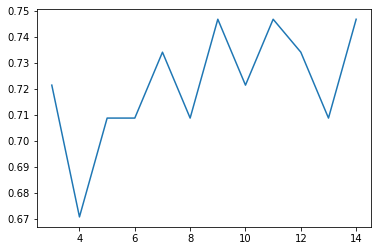

In [68]:
sns.lineplot(x=neighbors,y=accuracy,)

In [73]:
classifier = KNeighborsClassifier(n_neighbors=11, metric='minkowski')
classifier.fit(X_train,y_train)
y_predicted= classifier.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix,f1_score

In [86]:
print("accuracy score is ",accuracy_score(y_predicted,y_test))
cm = confusion_matrix(y_predicted,y_test)
print("f1 score is",f1_score(y_predicted,y_test))

accuracy score is  0.7468354430379747
f1 score is 0.8333333333333333


<AxesSubplot:>

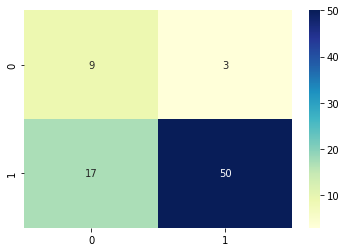

In [87]:
sns.heatmap(cm,annot=True,cmap="YlGnBu")